# Evaluating scGPT in zero-shot setting

In [1]:
import sys
sys.path.append("../")  # Adjust the path if needed

In [1]:
# Set up cache directories for local storage
import os

# Set environment variables for local cache directories
os.environ["PIP_CACHE_DIR"] = "./cache/pip"
os.environ["HF_HOME"] = "./cache/huggingface"
os.environ["TRANSFORMERS_CACHE"] = "./cache/transformers"
os.environ["MPLCONFIGDIR"] = "./cache/matplotlib"

# Create cache directories if they don't exist
cache_dirs = [
    "./cache/pip",
    "./cache/huggingface", 
    "./cache/transformers",
    "./cache/matplotlib"
]

for cache_dir in cache_dirs:
    os.makedirs(cache_dir, exist_ok=True)

print("Cache directories set up:")
print(f"PIP_CACHE_DIR: {os.environ.get('PIP_CACHE_DIR')}")
print(f"HF_HOME: {os.environ.get('HF_HOME')}")
print(f"TRANSFORMERS_CACHE: {os.environ.get('TRANSFORMERS_CACHE')}")
print(f"MPLCONFIGDIR: {os.environ.get('MPLCONFIGDIR')}")

Cache directories set up:
PIP_CACHE_DIR: ./cache/pip
HF_HOME: ./cache/huggingface
TRANSFORMERS_CACHE: ./cache/transformers
MPLCONFIGDIR: ./cache/matplotlib


In [ ]:
!pip install matplotlib
!pip install tqdm
!pip install seaborn
!pip install anndata==0.9.2
!pip install colorlog==6.7.0
!pip install scgpt==0.1.6
!pip install geneformer==0.0.1
!pip install PyComplexHeatmap


  Using cached torch-2.7.1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (29 kB)
Using cached torch-2.7.1-cp310-cp310-manylinux_2_28_x86_64.whl (821.2 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0
^C
ERROR: Operation cancelled by user

  Using cached anndata-0.9.2-py3-none-any.whl.metadata (6.1 kB)
Using cached anndata-0.9.2-py3-none-any.whl (104 kB)
  Attempting uninstall: anndata
    Found existing installation: anndata 0.11.4
    Uninstalling anndata-0.11.4:
      Successfully uninstalled anndata-0.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scgpt 0.2.4 requires torch>=1.13.0, which is not installed.
scvi-tools 0.20.3 requires torch>=1.8.0, which is not installed.
mudata 0.3.2 requires anndata>=0.10.8, but you have anndata 0.9.2 which is inc

In [4]:
import sys
sys.path.append("/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/zero-shot-scfoundation")

In [24]:
!pip install scgpt==0.1.6

  Using cached scgpt-0.1.6-py3-none-any.whl.metadata (8.1 kB)
  Using cached flash_attn-1.0.9.tar.gz (1.8 MB)
  Preparing metadata (setup.py) ... done
  Using cached leidenalg-0.8.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached llvmlite-0.38.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.7 kB)
  Using cached numba-0.55.2-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (3.3 kB)
  Using cached pandas-1.3.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached scanpy-1.9.8-py3-none-any.whl.metadata (6.0 kB)
  Using cached scikit_misc-0.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
  Using cached scvi_tools-0.16.4-py3-none-any.whl.metadata (9.4 kB)
  Using cached torch-1.13.0-cp310-cp310-manylinux1_x86_64.whl.metadata (23 kB)
  Using cached torchtext-0.14.0-cp310-cp310-manylinux1_x86_64.whl.metadata (6.9 kB)
  Using cached tran

In [7]:
!pip install torchtext==0.14.0
!pip install transformers==4.35.2


  Using cached regex-2024.11.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
  Using cached safetensors-0.5.3-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 47.4 MB/s eta 0:00:00
Using cached regex-2024.11.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (781 kB)
Using cached safetensors-0.5.3-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (471 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [transformers] [transformers]


In [1]:
import IPython
IPython.get_ipython().config.HistoryManager.enabled = False



In [3]:
import os
os.chdir("/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/zero-shot-scfoundation")


# Install Git LFS and clone the Geneformer repo
!git lfs install
!git clone https://huggingface.co/ctheodoris/Geneformer

# Change directory and install Geneformer in one command using subshell chaining
!pip install ./Geneformer


Run `git lfs install --force` to reset Git configuration.
Cloning into 'Geneformer'...
remote: Enumerating objects: 1205, done.
remote: Counting objects: 100% (247/247), done.
remote: Compressing objects: 100% (247/247), done.
remote: Total 1205 (delta 144), reused 0 (delta 0), pack-reused 958 (from 1)
Receiving objects: 100% (1205/1205), 5.77 MiB | 14.21 MiB/s, done.
Resolving deltas: 100% (754/754), done.
Filtering content: 100% (24/24), 3.32 GiB | 40.83 MiB/s, done.
Processing ./Geneformer
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached torch-2.7.1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 52.5 MB/s eta 0:00:00:00:0100:01
Using cached torch-2.7.1-cp310-cp310-manylinux_2_28_x86_64.whl (821.2 MB

In [11]:
import os

# Your new cache root - make sure this exists and is writable
NEW_CACHE_DIR = "/cs/student/projects1/aibh/2024/rmaheswa/cache"

os.makedirs(NEW_CACHE_DIR, exist_ok=True)

# Matplotlib cache
os.environ["MPLCONFIGDIR"] = os.path.join(NEW_CACHE_DIR, "matplotlib")

# Hugging Face Transformers cache
os.environ["TRANSFORMERS_CACHE"] = os.path.join(NEW_CACHE_DIR, "huggingface", "transformers")

# Hugging Face Datasets cache
os.environ["HF_DATASETS_CACHE"] = os.path.join(NEW_CACHE_DIR, "huggingface", "datasets")

# Tokenizers cache (Hugging Face)
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["HF_HOME"] = os.path.join(NEW_CACHE_DIR, "huggingface")

# PyTorch cache (optional)
os.environ["TORCH_HOME"] = os.path.join(NEW_CACHE_DIR, "torch")

# Python temp dir (optional)
os.environ["TMPDIR"] = os.path.join(NEW_CACHE_DIR, "tmp")

# Optionally, you can also redirect fontconfig cache (if you use matplotlib heavily)
os.environ["FONTCONFIG_PATH"] = os.path.join(NEW_CACHE_DIR, "fontconfig")

# Make sure all these directories exist
for d in [
    os.environ["MPLCONFIGDIR"],
    os.environ["TRANSFORMERS_CACHE"],
    os.environ["HF_DATASETS_CACHE"],
    os.environ["HF_HOME"],
    os.environ["TORCH_HOME"],
    os.environ["TMPDIR"],
    os.environ["FONTCONFIG_PATH"],
]:
    os.makedirs(d, exist_ok=True)


In [12]:
import os

# Set this at the top, BEFORE any transformers or geneformer import
os.environ["TRANSFORMERS_CACHE"] = "/cs/student/projects1/aibh/2024/rmaheswa/cache/huggingface"

# Now import
from transformers import BertForMaskedLM


/cs/student/projects1/aibh/2024/rmaheswa/miniconda3/envs/sc_foundation_evals/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# !pip uninstall torch -y


rm: cannot remove '/cs/student/projects1/aibh/2024/rmaheswa/miniconda3/envs/sc_foundation_evals/lib/python3.10/site-packages/~~rch/lib/.nfs00000000fdbaa42b000000dd': Device or resource busy
rm: cannot remove '/cs/student/projects1/aibh/2024/rmaheswa/miniconda3/envs/sc_foundation_evals/lib/python3.10/site-packages/~~rch/lib/.nfs00000000179d4e4a000000de': Device or resource busy
rm: cannot remove '/cs/student/projects1/aibh/2024/rmaheswa/miniconda3/envs/sc_foundation_evals/lib/python3.10/site-packages/~~rch/lib/.nfs00000000a81a0775000000db': Device or resource busy
rm: cannot remove '/cs/student/projects1/aibh/2024/rmaheswa/miniconda3/envs/sc_foundation_evals/lib/python3.10/site-packages/~~rch/lib/.nfs0000000013b94b9d000000dc': Device or resource busy
rm: cannot remove '/cs/student/projects1/aibh/2024/rmaheswa/miniconda3/envs/sc_foundation_evals/lib/python3.10/site-packages/~~rch/lib/.nfs00000000a28f2f6b000000df': Device or resource busy
rm: cannot remove '/cs/student/projects1/aibh/2024

: 

In [14]:
!pip install transformers==4.30.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 32.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 30.5 MB/s eta 0:00:00:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0/2 [tokenizers]  WARNING: Failed to remove contents in a temporary directory '/cs/student/projects1/aibh/2024/rmaheswa/miniconda3/envs/sc_foundation_evals/lib/python3.10/site-packages/~okenizers'.
  You can safely remove it manually.
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.22m0/2 [tokenizers]
    Uninstalling transformers-4.35.2:╺━━━━━━━━━━━━━━━━━━━ 1/2 [transformers]
      Successfully uninstalled transformers-4.35.2━━━━━━━━━━━━━━━━ 1/2 [transformers]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [transformers] [transformers]


In [2]:
!pip uninstall transformers 
!pip install transformers==4.30.2 


  Using cached transformers-4.30.2-py3-none-any.whl.metadata (113 kB)
Using cached transformers-4.30.2-py3-none-any.whl (7.2 MB)


In [7]:
import os

os.environ['TRANSFORMERS_CACHE'] = '/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/zero-shot-scfoundation/cache/transformers'
os.environ['HF_HOME'] = '/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/zero-shot-scfoundation/cache/huggingface'
os.environ['XDG_CACHE_HOME'] = '/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/zero-shot-scfoundation/cache/.xdg'
os.environ['MPLCONFIGDIR'] = '/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/zero-shot-scfoundation/cache/matplotlib'
os.environ['PYTHON_EGG_CACHE'] = '/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/zero-shot-scfoundation/cache/egg'
os.environ['TORCH_HOME'] = '/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/zero-shot-scfoundation/cache/torch'
os.environ['TMPDIR'] = '/cs/student/projects1/aibh/2024/rmaheswa/Dissertation/zero-shot-scfoundation/cache/tmp'


In [8]:
import transformers
print(transformers.__version__)


4.35.2


In [12]:
!pip uninstall -y transformers
!pip install transformers==4.35.2


Found existing installation: transformers 4.30.2
Uninstalling transformers-4.30.2:
  Successfully uninstalled transformers-4.30.2
  Using cached transformers-4.35.2-py3-none-any.whl.metadata (123 kB)
  Using cached tokenizers-0.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached transformers-4.35.2-py3-none-any.whl (7.9 MB)
Using cached tokenizers-0.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0/2 [tokenizers]  WARNING: Failed to remove contents in a temporary directory '/cs/student/projects1/aibh/2024/rmaheswa/miniconda3/envs/sc_foundation_evals/lib/python3.10/site-packages/~okenizers.libs'.
  You can safely remove it manually.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0/2 [tokenizers]  WARNING: Failed

In [9]:
import os
import logging
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sc_foundation_evals import cell_embeddings, scgpt_forward, data, model_output
from sc_foundation_evals.helpers.custom_logging import log

log.setLevel(logging.INFO)

ImportError: cannot import name 'Cache' from 'transformers' (/cs/student/projects1/aibh/2024/rmaheswa/miniconda3/envs/sc_foundation_evals/lib/python3.10/site-packages/transformers/__init__.py)

## Setting up variables

Define some variables, that we will rely on later, starting with paths and run configs.

In [30]:
# path to the pre-trained model, 3 files are expected: 
# model_weights (best_model.pt), model args (args.json), and model vocab (vocab.json)
model_dir="../data/weights/scgpt/scGPT_human"
# batch_size depends on available GPU memory; should be a multiple of 8
batch_size=32
# output_dir is the path to which the results should be saved
output_dir="../output/scgpt/scgpt_human/"
# path to where we will store the embeddings and other evaluation outputs
model_out = os.path.join(output_dir, "model_outputs")
# if you can use multithreading specify num_workers
num_workers=0

Now, the model configs

In [31]:
input_bins=51
model_run="pretrained"
seed=7
n_hvg=1200
# maximum sequence of the input is controlled by max_seq_len, here I'm using the pretrained default
max_seq_len=1200

And finally, data configs. Here, I will use the pancreas dataset to showcase the analyses. I downloaded the pancreas dataset can be accessed using the following code (as specified in the scvi-tools docs [here](https://docs.scvi-tools.org/en/stable/tutorials/notebooks/scrna/scarches_scvi_tools.html#reference-mapping-with-scvi)). I slightly modified the batch column, as shown below. 

```python
import scanpy as sc

pancreas_adata_path = "../data/datasets/pancreas_scib.h5ad"

pancreas_adata = sc.read(
    pancreas_adata_path,
    backup_url="https://figshare.com/ndownloader/files/24539828",
)

pancreas_adata.obs['batch'] = (
    pancreas_adata.obs["tech"]
    .str.lower()
    # merge indrop as those are all the same technology  
    .str.replace("indrop[0-9]*", "indrop", regex=True)
    )

pancreas_adata.write_h5ad(pancreas_adata_path, compression="gzip")
```

In [32]:
# specify the path to anndata object
dataset_path = "../data/datasets/pancreas_scib.h5ad"
# in which column in adata.obs are gene names stored? if they are in index, the index will be copied to a column with this name
gene_col = "gene_symbols"
# batch column found in adata.obs
batch_col = "tech" #"batch"
# where are labels stored in adata.obs? 
label_cols = ["celltype"]
# where the raw counts are stored?
layer_key = "counts"
# are the values log_norm already?
log_norm = False

## Loading model and data

In [33]:
# create the model
scgpt_model = scgpt_forward.scGPT_instance(saved_model_path = model_dir,
                                           model_run = model_run,
                                           batch_size = batch_size, 
                                           save_dir = output_dir,
                                           num_workers = num_workers, 
                                           explicit_save_dir = True)

INFO     | 2025-07-22 23:17:16 | Using device cuda


In [28]:
# create config
scgpt_model.create_configs(seed = seed, 
                           max_seq_len = max_seq_len, 
                           n_bins = input_bins)

Loading the pretrained model. The log will show that some weights cannnot be loaded, as long as it is `cls_*` it's ok, as we are evaluating it in zero-shot setting, and those layers are not used.

In [35]:
scgpt_model.load_pretrained_model()

AttributeError: 'scGPT_instance' object has no attribute 'model_config'

In [8]:
input_data = data.InputData(adata_dataset_path = dataset_path)

INFO     | 2023-12-05 13:19:00 | Loading data from ../data/datasets/pancreas_scib.h5ad


To process the data we need the vocbulary. That we get from the model.

In [9]:
vocab_list = scgpt_model.vocab.get_stoi().keys()

Prepprocessing according to the steps as written in the scGPT repository. We will filter for the 1200 highly variable genes here.

In [10]:
input_data.preprocess_data(gene_vocab = vocab_list,
                           model_type = "scGPT",
                           gene_col = gene_col,
                           data_is_raw = not log_norm,
                           counts_layer = layer_key, 
                           n_bins = input_bins,
                           n_hvg = n_hvg)

WARNING  | 2023-12-05 13:19:10 | Gene names not found in var columns. Using index instead.
INFO     | 2023-12-05 13:19:10 | Matched 18160/19093 genes in vocabulary of size 60697.
INFO     | 2023-12-05 13:19:10 | Preprocessing data


scGPT - INFO - Filtering genes by counts ...
scGPT - INFO - Filtering cells by counts ...
scGPT - INFO - Normalizing total counts ...
scGPT - INFO - Log1p transforming ...
scGPT - INFO - Subsetting highly variable genes ...
scGPT - WARNING - No batch_key is provided, will use all cells for HVG selection.
scGPT - INFO - Binning data ...


In [11]:
scgpt_model.tokenize_data(data = input_data,
                          input_layer_key = "X_binned",
                          include_zero_genes = False)

INFO     | 2023-12-05 13:19:33 | Tokenizing data


## Evaluating model outputs

First, we will perform forward pass on the model and extract embeddings.

In [12]:
scgpt_model.extract_embeddings(data = input_data)

INFO     | 2023-12-05 13:19:34 | Preparing dataloader
INFO     | 2023-12-05 13:19:34 | Saving config to ../output/scgpt/scgpt_human/
INFO     | 2023-12-05 13:19:34 | Extracting embeddings
INFO     | 2023-12-05 13:19:34 | Saving config to ../output/scgpt/scgpt_human/
INFO     | 2023-12-05 13:19:34 | Extracting embeddings
INFO     | 2023-12-05 13:19:35 | Extracting embeddings for batch 1/512
INFO     | 2023-12-05 13:19:41 | Extracting embeddings for batch 52/512
INFO     | 2023-12-05 13:19:44 | Extracting embeddings for batch 103/512
INFO     | 2023-12-05 13:19:47 | Extracting embeddings for batch 154/512
INFO     | 2023-12-05 13:19:50 | Extracting embeddings for batch 205/512
INFO     | 2023-12-05 13:19:53 | Extracting embeddings for batch 256/512
INFO     | 2023-12-05 13:19:56 | Extracting embeddings for batch 307/512
INFO     | 2023-12-05 13:19:59 | Extracting embeddings for batch 358/512
INFO     | 2023-12-05 13:20:02 | Extracting embeddings for batch 409/512
INFO     | 2023-12-05 13

Next, we will specify what we want to evaluate in the output evaluations. Here, we will be using output of two pre-training objectives: masked language modelling (**MLM**), aka gene expression prediction (GEP), and **MVC** (not entirely sure what this abbreviation stands for), aka gene expression prediction from cell embedding (GEPC). 

In [13]:
eval_pred = model_output.GeneExprPredEval(scgpt_model,
                                         data = input_data,
                                         output_dir = model_out,
                                         embedding_key = ["mlm_output", 
                                                          "mvc_output"])

In [14]:
eval_pred.evaluate()

WARNING  | 2023-12-05 13:20:12 | mlm_output is not a tensor


WARNING  | 2023-12-05 13:20:13 | mvc_output is not a tensor


MSE     MSE_all       MRE   MRE_all        MAE    MAE_all
mlm_output  200.974411  200.974411  0.412700  0.412700  12.040932  12.040932
mvc_output  148.520004  148.520004  0.443404  0.445765  10.183268  10.183268
mean        202.451447  202.451447  0.487606  0.487606  12.320333  12.320333

We can also visualize the input bins and output of both of the pretraining objective.

Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

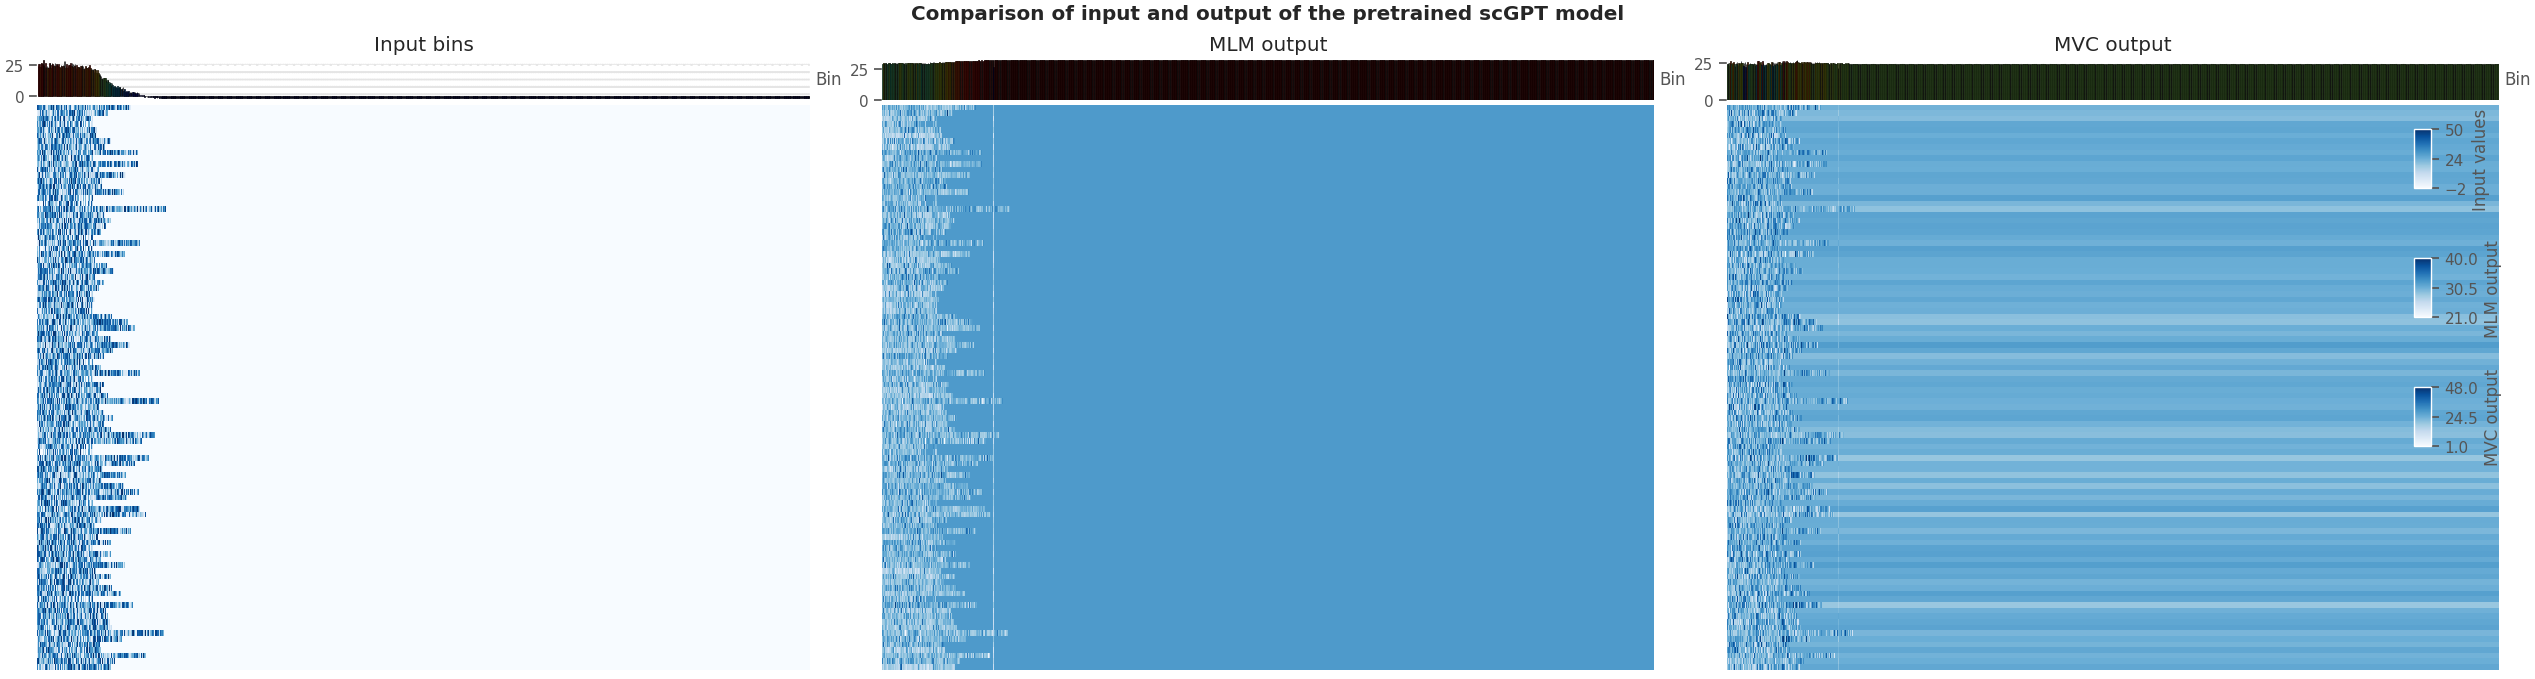

In [15]:
eval_pred.visualize(label_key = label_cols[-1])

# Evaluate the cell embeddings

In [16]:
eval_ce = cell_embeddings.CellEmbeddingsEval(scgpt_model,
                                             data = input_data,
                                             output_dir = model_out,
                                             label_key = label_cols,
                                             batch_key = batch_col)

In [17]:
# with n_cells you can specify how much to subset the obs for
eval_ce.evaluate(n_cells = 1000)

WARNING  | 2023-12-05 13:20:39 | adata_ has 16382 cells. Taking a subset of 1000 cells.


metric     label     value
0  NMI_cluster/label  celltype  0.575922
1  ARI_cluster/label  celltype  0.384832
2          ASW_label  celltype  0.527416
3         graph_conn  celltype  0.909105
4          ASW_batch  celltype  0.502584
5    ASW_label/batch  celltype  0.877185
6          PCR_batch  celltype  0.320129
7            avg_bio  celltype  0.496057

WARNING  | 2023-12-05 13:21:50 | adata_ has 16382 cells. Taking a subset of 7500 cells.
WARNING  | 2023-12-05 13:21:51 | More than 10 labels for celltype.The plots might be hard to read.


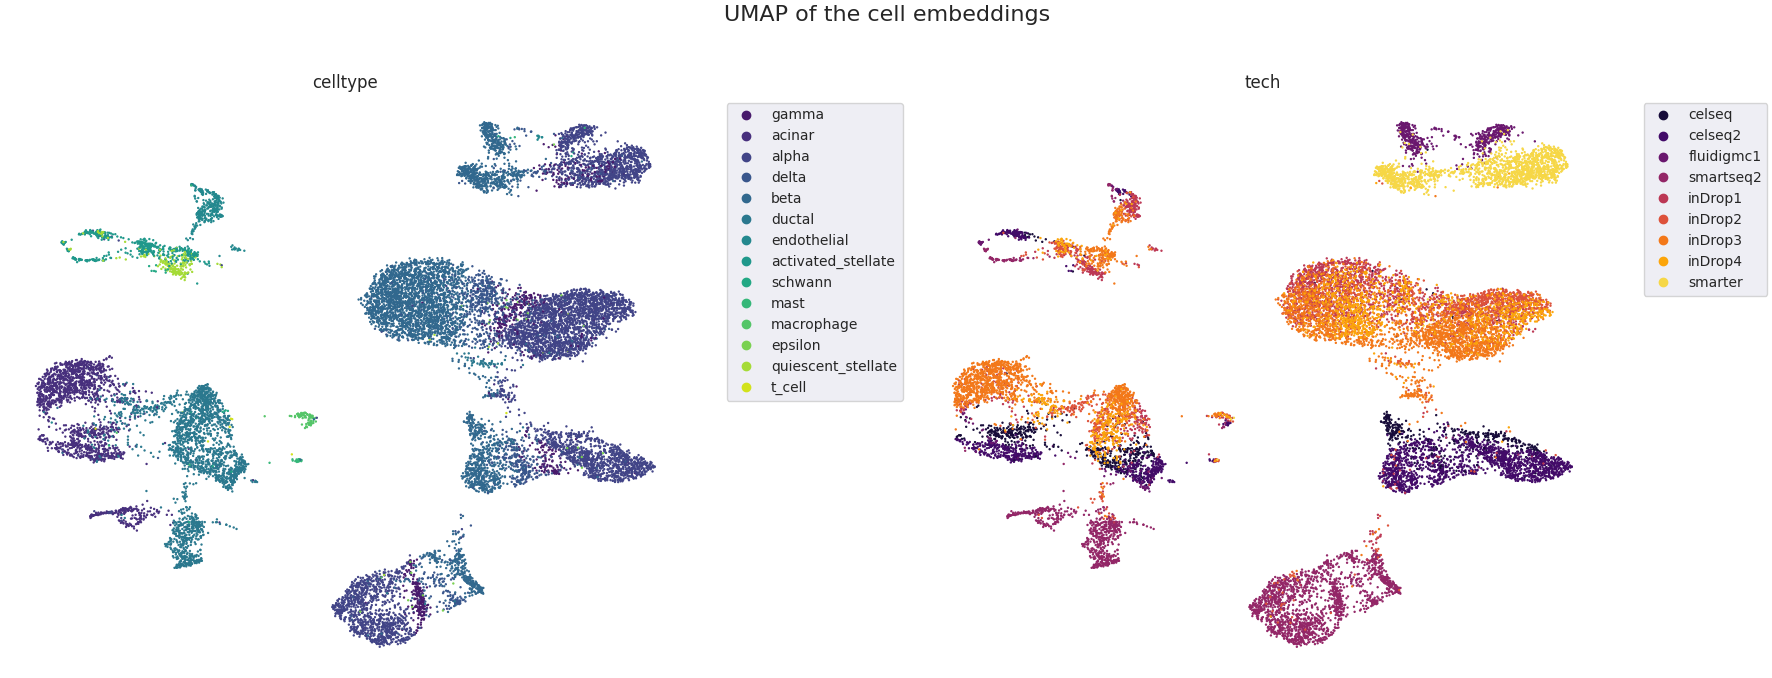

In [18]:
eval_ce.visualize()